Primero cargamos los paquetes a utilizar.

In [12]:
import numpy as np
import scipy as sc
from scipy.stats import norm  #
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.diagnostic import het_breuschpagan

Cargamos la base de datos.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Ruta al archivo en Google Drive
file_path = "/content/drive/My Drive/Colab Notebooks/Maestría en estadística/PAD/base_regresion.csv"

# Leer el CSV
df = pd.read_csv(file_path, encoding='latin-1')

# Mostrar las primeras filas
df.head()

Vemos que variables tenemos en la base de datos.

In [ ]:
df.columns

Index(['id', 'precio', 'tipo', 'valoraciones', 'puntaje', 'personas',
       'dormitorios', 'baños', 'estadia', 'distancia', 'dependencias'],
      dtype='object')

# a) Medidas descriptivas

In [ ]:
df.describe(include='all')

,id,precio,tipo,valoraciones,puntaje,personas,dormitorios,baños,estadia,distancia,dependencias
count,5396.000000,5396.000000,5396,5396.000000,5396.000000,5396.000000,5396.000000,5396.000000,5396.000000,5396.000000,5396.000000
unique,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Entire home/apt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,3708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2698.500000,70.426612,NaN,7.805041,2.537806,2.432543,1.229059,1.066531,3.072461,1033.206753,13.311342
std,1557.835357,92.659073,NaN,16.883469,2.334505,1.278354,0.879473,0.801194,2.727156,473.076171,14.389671
min,1.000000,10.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.317087,0.000000
25%,1349.750000,34.000000,NaN,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,654.152415,4.000000
50%,2698.500000,50.000000,NaN,1.000000,4.000000,2.000000,1.000000,1.000000,3.000000,989.466417,8.000000
75%,4047.250000,75.000000,NaN,7.000000,5.000000,3.000000,1.000000,1.000000,4.000000,1415.257710,18.000000


In [ ]:
473/1033, 14/13

(0.4578896418199419, 1.0769230769230769)

<p style="text-align: justify;">

Como se observa en la tabla, la base contiene 5396 observaciones. No hay datos faltantes, ya que cada variable tiene las 5396 observaciones. Las variables precio, valoraciones, puntaje, personas, dormitorios, baños, estadia, distancia y dependencias son numéricas mientras que la variable tipo es categórica (id es solo la identificación de la observación).

Podemos ver que en la variable tipo existen 3 categorías, de las cuales "Entire home/apt" es la más frecuente. Más de la mitad de las observaciones provienen de esta categoría.

El precio promedio en dólares de una noche en los alojamientos es de U$S 70.24, con rango de variabilidad entre los 10 y los 4000 dólares.

El puntaje promedio de los alojamientos es de 2.53 puntos sobre un total de 5 y un mínimo de 0.

En promedio, cada alojamiento ha recido 7.8 valoraciones. Pero, mientras algunos han tenido 0 valoraciones, otros llegan a 180.

El 50% de los alojamientos dispone de 1 dormitorio y un baño, y están preparados para recibia a entre 2 y 3 personas. Los más grandes contienen hasta 10 dormitorios y 8 baños, y pueden alojar hasta 6 personas.

En promedio, los alojamientos requieren una estadía mínima de 3 noches. Sin embargo, algunos no tienen ningún tipo de requerimiento y otros presentan requerimientos mucho mayores, hasta un mes practicamente. De todas formas, el 75% de los alojamientos solo exije 4 noches o menos.

Por último, observamos una gran disparidad en la oferta de alojamientos según la distancia de los mismos a la estación de trenes más cercana (varía entre 27 metros y los 3 kilómetros) y a la cantidad de dependencias culturales a menos de 300 metros a la redonda (algunos tienen 0 y otros llegan a 97).

# Histogramas

Con el objetivo de analizar las distribuciones de las variables, graficamos el histograma correspondiente a cada una.

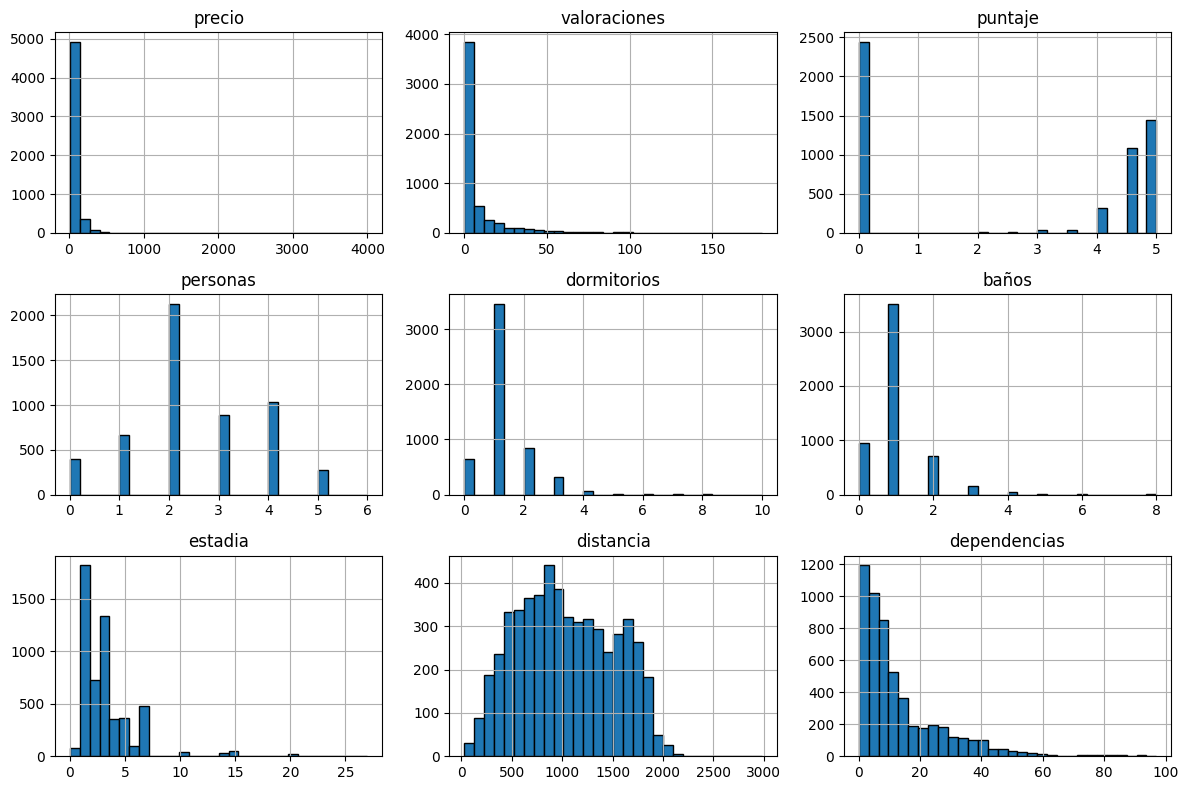

In [3]:
# Crear histogramas para cada columna numérica
df.loc[:, df.columns != 'id'].hist(figsize=(12, 8), bins=30, edgecolor='black')

# Mostrar los histogramas
plt.tight_layout()
plt.show()

Se observa que ninguna variable presenta un comportamineto similar al de una variable aleatoria normal. El principal hecho de interés aquí radica en que la variable objetivo (precio) presenta una distribución muy sesgada a derecha.

Realizamos un gráfico de barra para observar las categorías que caen en cada categoría de la variable tipo.

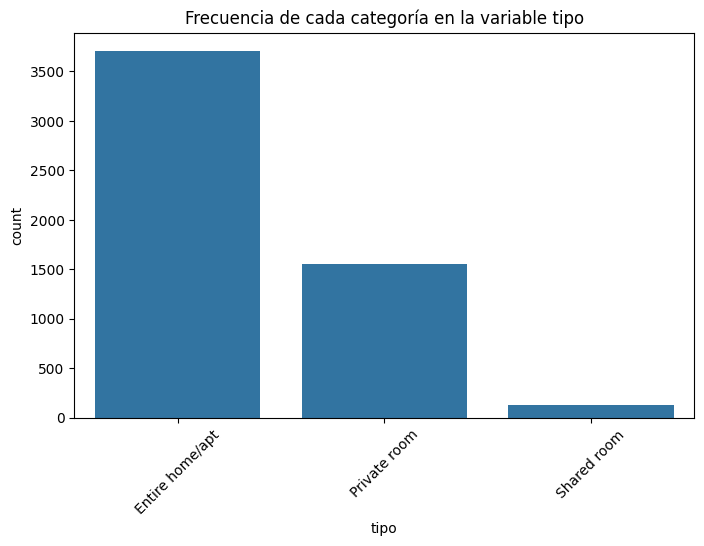

In [27]:
df['private'] = (df['tipo'] == 'Private room').astype(int)
df['shared'] = (df['tipo'] == 'Shared room').astype(int)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='tipo', order=df['tipo'].value_counts().index)
plt.xticks(rotation=45)  # Rotar etiquetas si hay muchas categorías
plt.title('Frecuencia de cada categoría en la variable tipo')
plt.show()

Como podemos observar, existe una gran disparidad entre las categorías. La mayoria de las observaciones caen en la categoría "Entire home/apt". Poco menos de 1 tercio de las observaciones caen en la categoría "Private room" y unas pocas en la categoría "Shared room".

Vemos ahora la matriz de correlaciones entre todas las variables donde hemos construido variables dummies para representar las categorías de la variable original "tipo".

In [ ]:
correlation_matrix = df[['precio', 'valoraciones', 'puntaje', 'personas', 'dormitorios', 'baños', 'estadia', 'distancia', 'dependencias', 'private', 'shared']].corr()
pd.options.display.float_format = "{:.2f}".format
correlation_matrix

,precio,valoraciones,puntaje,personas,dormitorios,baños,estadia,distancia,dependencias,private,shared
precio,1.00,-0.05,-0.06,-0.00,0.41,0.11,0.00,-0.03,-0.05,-0.18,-0.07
valoraciones,-0.05,1.00,0.43,0.05,-0.03,-0.01,-0.07,0.04,-0.00,-0.12,-0.05
puntaje,-0.06,0.43,1.00,0.05,-0.01,-0.02,0.02,0.02,-0.00,-0.15,-0.07
personas,-0.00,0.05,0.05,1.00,0.02,-0.11,0.07,0.02,0.06,-0.34,-0.09
dormitorios,0.41,-0.03,-0.01,0.02,1.00,0.23,0.09,-0.02,-0.05,-0.17,-0.04
baños,0.11,-0.01,-0.02,-0.11,0.23,1.00,0.00,-0.01,0.00,0.03,0.04
estadia,0.00,-0.07,0.02,0.07,0.09,0.00,1.00,-0.04,-0.02,-0.15,-0.07
distancia,-0.03,0.04,0.02,0.02,-0.02,-0.01,-0.04,1.00,0.14,0.03,0.01
dependencias,-0.05,-0.00,-0.00,0.06,-0.05,0.00,-0.02,0.14,1.00,-0.07,0.01
private,-0.18,-0.12,-0.15,-0.34,-0.17,0.03,-0.15,0.03,-0.07,1.00,-0.10


La variable objetivo precio presenta la mayor correlación con la variable dormitorios, le sigue la variable dummie private y la variable baños.

Entre los regresores parece ser que exite


*   Alta correlación entre las variables puntaje y valoraciones
*   Moderada correlación negativa entre las variables persona y private
*   La correlación más fuerte para la variable dormitorios se da con la variable baños (0.23).

El resto no parce ser muy llamativo.


# b) Transformación de la variable

Dada la asimetría de la variable objetivo precio, puede resultar beneficioso a los fines del análisis transformarla aplicandole el logaritmo. Esta transformación genera una nueva variable cuya distribución será más simétrica (más parecida a la distribución normal).

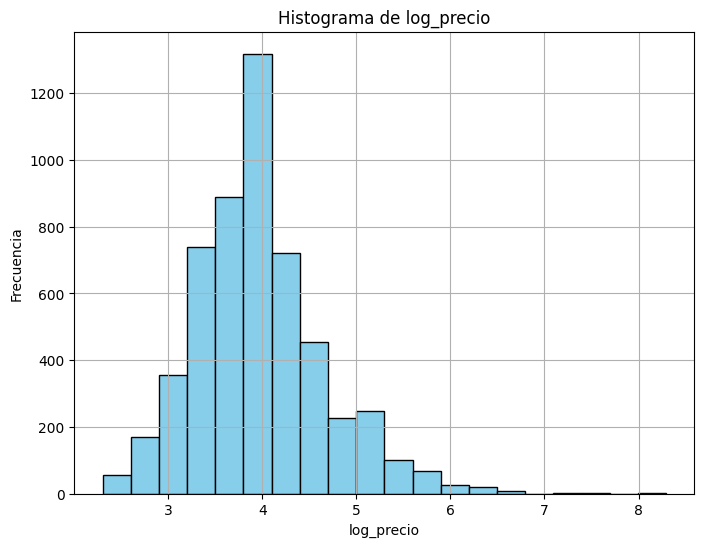

In [5]:
df['log_precio'] = np.log(df['precio'])
# Crear histograma de la variable log_precio
plt.figure(figsize=(8, 6))
plt.hist(df['log_precio'], bins=20, edgecolor='black', color='skyblue')
plt.title('Histograma de log_precio')
plt.xlabel('log_precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Como se puede observar, la distribución es ahora más simétrica (aunque no necesariamente normal).

Veamos ahora la matriz de correlaciones pero considerando la variable objetivo transformada.

In [ ]:
correlation_matrix = df[['log_precio', 'valoraciones', 'puntaje', 'personas', 'dormitorios', 'baños', 'estadia', 'distancia', 'dependencias', 'private', 'shared']].corr()
correlation_matrix

,log_precio,valoraciones,puntaje,personas,dormitorios,baños,estadia,distancia,dependencias,private,shared
log_precio,1.00,-0.04,-0.06,0.20,0.49,0.05,0.02,-0.05,-0.03,-0.41,-0.21
valoraciones,-0.04,1.00,0.43,0.05,-0.03,-0.01,-0.07,0.04,-0.00,-0.12,-0.05
puntaje,-0.06,0.43,1.00,0.05,-0.01,-0.02,0.02,0.02,-0.00,-0.15,-0.07
personas,0.20,0.05,0.05,1.00,0.02,-0.11,0.07,0.02,0.06,-0.34,-0.09
dormitorios,0.49,-0.03,-0.01,0.02,1.00,0.23,0.09,-0.02,-0.05,-0.17,-0.04
baños,0.05,-0.01,-0.02,-0.11,0.23,1.00,0.00,-0.01,0.00,0.03,0.04
estadia,0.02,-0.07,0.02,0.07,0.09,0.00,1.00,-0.04,-0.02,-0.15,-0.07
distancia,-0.05,0.04,0.02,0.02,-0.02,-0.01,-0.04,1.00,0.14,0.03,0.01
dependencias,-0.03,-0.00,-0.00,0.06,-0.05,0.00,-0.02,0.14,1.00,-0.07,0.01
private,-0.41,-0.12,-0.15,-0.34,-0.17,0.03,-0.15,0.03,-0.07,1.00,-0.10


Se observa que las correlaciones tienden a volverse más fuertes (en valor absoluto).

# c) Primeras Regresiones lineales

Vamos a regresar la variable objetivo precio en las variables explicativas valoraciones, puntaje, personas, dormitorios, baños y estadía.

In [8]:
# Definir las variables independientes (X) y dependientes (Y)
X = df[['valoraciones', 'puntaje', 'personas', 'dormitorios', 'baños', 'estadia']]
Y = df['precio']

# Agregar una constante a las variables independientes (intercepto de la regresión)
X = sm.add_constant(X)

# Crear el modelo de regresión lineal
model = sm.OLS(Y, X)

# Ajustar el modelo
results = model.fit()

# Imprimir el resumen de los resultados
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     190.1
Date:                Mon, 14 Apr 2025   Prob (F-statistic):          2.30e-220
Time:                        23:23:59   Log-Likelihood:                -31576.
No. Observations:                5396   AIC:                         6.317e+04
Df Residuals:                    5389   BIC:                         6.321e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           25.1520      3.603      6.980   

Las variables que resultan significativas al 5% son puntaje, dormitorios y estadía.

La interpretación de los coeficientes estimados es la siguiente:
*   Al aumentar en 1 la cantidad de valoraciones que ha recibido el alojamiento el precio tiende a caer en 0.14 dolares en promedio.
*   Al aumentar en 1 el puntaje promedio el precio tiende a disminuir en 1.79 dolares en promedio.
*   Al aumentar en 1 la cantidad de personas que puede recibir el alojamiento el precio tiende a disminuir en 0.19 dolares en promedio.
* Al aumentar en 1 la cantidad de dormitorios que dispone el alojamiento el precio tiende a aumentar en 43.25 dólares en promedio.
* Al aumentar en 1 la cantidad de baños disponibles en el alojamiento el precio tiende a aumentar en 1.67 dólares en promedio.
* Al aumentar en 1 día la estadía mínima requerida el precio tiende a disminuir en 1.15 dólares en promedio.

El modelo logra explicar un 17,5% de la variabilidad total del precio de los alojamientos según el $R^2$.

Analicemos los residuos del modelo para determinar si se cumplen los supuestos clásicos del modelo de regresión lineal.

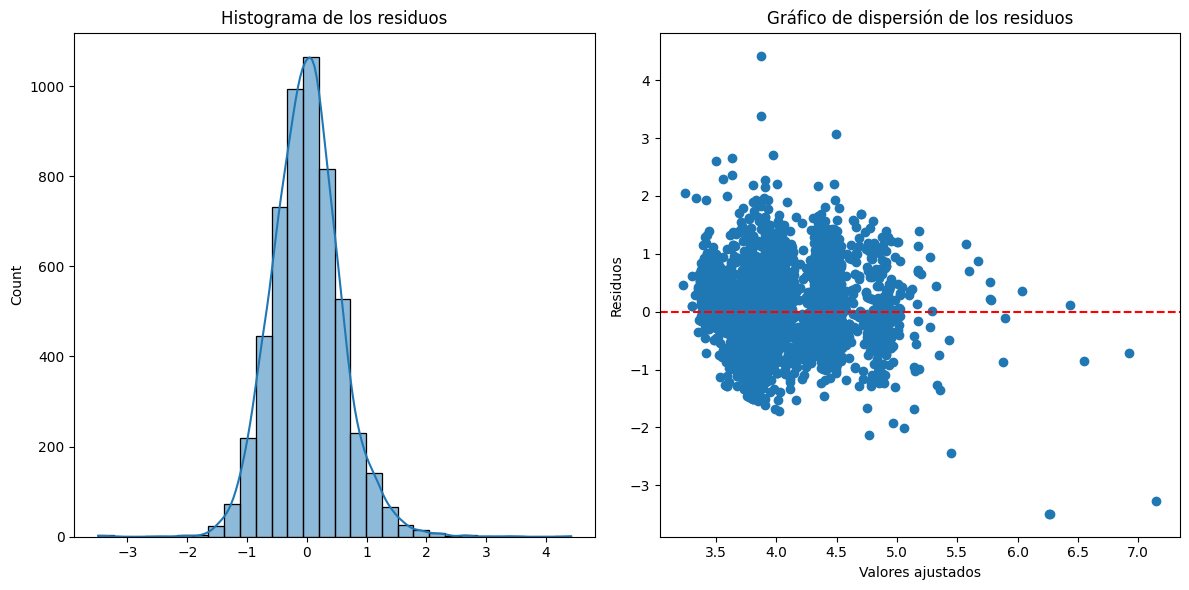

Estadístico KS: 0.03054750244056026
Valor p de KS: 8.276944079220784e-05


In [13]:
from scipy import stats

# Ajustar el modelo
results = model.fit()

# Obtener los residuos
residuals = results.resid

# Graficar los residuos
plt.figure(figsize=(12, 6))

# Histograma de los residuos
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, bins=30)
plt.title("Histograma de los residuos")

# Gráfico de dispersión de los residuos
plt.subplot(1, 2, 2)
plt.scatter(results.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Gráfico de dispersión de los residuos")
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')

plt.tight_layout()
plt.show()

# Test de Kolmogorov-Smirnov
ks_stat, ks_p_value = stats.kstest(residuals, 'norm', args=(np.mean(residuals), np.std(residuals)))
print(f"Estadístico KS: {ks_stat}")
print(f"Valor p de KS: {ks_p_value}")

En este caso, los residuos no parecen seguir una distribución normal, el test de Kolmogorov rechaza la hipótesis nula de normalidad, y además parecen presentar heterocedasticidad. La transformación logarítmica posiblemente ayude con estos problemas. Otra opción es considerar que tenemos una muestra de tamaño grande, considerar normalidad asintótica para nuestros estimadores y estimar una matriz de varianzas y covarianzas robusta.

Primero vamos a repetir la regresión pero considerando la variable transformada.

In [10]:
# Definir las variables independientes (X) y dependientes (Y)
X = df[['valoraciones', 'puntaje', 'personas', 'dormitorios', 'baños', 'estadia']]
Y = df['log_precio']

# Agregar una constante a las variables independientes (intercepto de la regresión)
X = sm.add_constant(X)

# Crear el modelo de regresión lineal
model = sm.OLS(Y, X)

# Ajustar el modelo
results = model.fit()

# Imprimir el resumen de los resultados
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             log_precio   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     349.4
Date:                Mon, 14 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:25:18   Log-Likelihood:                -4735.5
No. Observations:                5396   AIC:                             9485.
Df Residuals:                    5389   BIC:                             9531.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.3631      0.025    134.990   

Antes de sacar alguna conclusión de esta regresión, hagamos un análisis de los residuos de la misma.

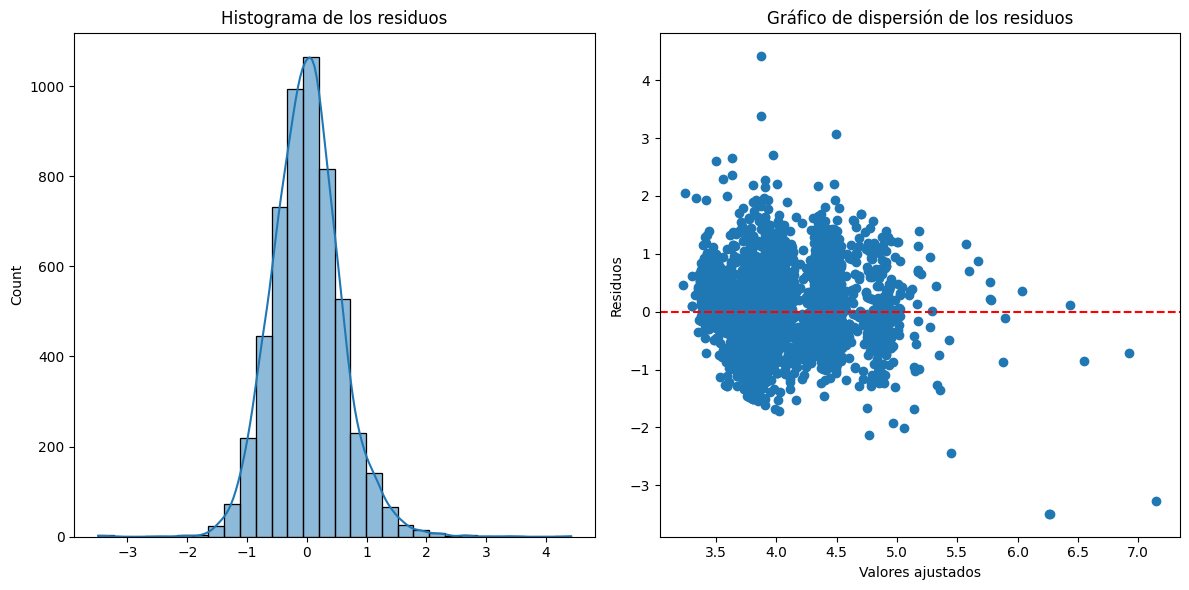

Estadístico KS: 0.03054750244056026
Valor p de KS: 8.276944079220784e-05


In [11]:
# Ajustar el modelo
results = model.fit()

# Obtener los residuos
residuals = results.resid

# Graficar los residuos
plt.figure(figsize=(12, 6))

# Histograma de los residuos
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, bins=30)
plt.title("Histograma de los residuos")

# Gráfico de dispersión de los residuos
plt.subplot(1, 2, 2)
plt.scatter(results.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Gráfico de dispersión de los residuos")
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')

plt.tight_layout()
plt.show()

# Test de Kolmogorov-Smirnov
ks_stat, ks_p_value = stats.kstest(residuals, 'norm', args=(np.mean(residuals), np.std(residuals)))
print(f"Estadístico KS: {ks_stat}")
print(f"Valor p de KS: {ks_p_value}")

In [17]:
X = df[['valoraciones', 'puntaje', 'personas', 'dormitorios', 'baños', 'estadia']]
X = sm.add_constant(X)
bp_test = het_breuschpagan(residuals, X)
print("el p-valor de la prueba b-p es:", bp_test[3])

el p-valor de la prueba b-p es: 2.5708463466352274e-95


Conclusiones de la regresión al considerar la variable transformada

Si bien se sigue rechazando la hipótesis nula de normalidad, hay algunas cosas a tener en cuenta:

1.   Los residuos presentan una distribución simétrica (más cercana a una normal)
2.   Los residuos parecen comportarse de forma homocedastica. Sin embargo, el test de Breusch-Pagan rechaza la hipótesis nula de homocedasticidad.
3.   El $R^2$ aumenta de forma importante. El nuevo modelo explica $28 \%$ de la variabilidad total de los datos.
4.   Todas las variables explicativas ahora son significativas salvo la variable valoraciones. Es posible que esto se deba a una fuerte correlación con la variable puntaje.
5.  La interpretación de los parámetros estimados cambia. Ahora cuando la variable explicativa aumenta parámetro estimado $\hat{\beta}$ positivo debe interpretarse como que el precio tiende a aumentar en un  $\hat{\beta}$ porciento cuando dicha variable explicativa auemnta en una unidad. Y un parámetro estimado $\hat{\beta}$ negativo debe interpretarse como que el precio tiende a disminuir en un  $|\hat{\beta}|$ porciento cuando dicha variable explicativa auemnta en una unidad.
6.  Dada la cantidad de datos disponibles, el no cumplimiento del supuesto de normalidad no resulta muy importante. Esto se debe a que sabemos que los estimadores MCO convergen en distribución a una normal cuando el tamaño muetral tiende a infinito sin importar la distribución del término de error. Esta convergencia ocurre más rápido cuanto más "cercana" sea la distribución de los errores a una normal. Por este motivo, la transformación logaritmica nos ayuda a que la distribución del los $\hat{\beta}$ sea más cercana a la normal.


El modelo a estimar en este caso es:

$$ P_i = e^{x'_i \beta + \varepsilon_i}  $$

Y el modelo transformado sería:

$$ \log{(P_i)} = x'_i \beta + \varepsilon_i $$

A partir de aquí, siempre consideraremos la variable transformada.

# d) Buscando un mejor modelo

Vamos a probar agregar o sacar variables sin considerar todavía la variable categórica tipo.
Para ello vamos a aplicar backward selection y forward selection según p_valor.

In [20]:
# Definir las variables dependientes (Y) e independientes (X)
X = df[['valoraciones', 'puntaje', 'personas', 'dormitorios', 'baños', 'estadia', 'distancia', 'dependencias']]
y = df['log_precio']

# Añadir la constante para el intercepto
X = sm.add_constant(X)

# Crear el modelo inicial con todas las variables
model = sm.OLS(y, X).fit()

# Función de selección hacia atrás
def backward_selection(X, y):
    while True:
        # Ajustar el modelo de regresión
        model = sm.OLS(y, X).fit()

        # Obtener el p-valor más alto de las variables
        max_p_value = model.pvalues.max()

        # Si el p-valor más alto es mayor que 0.05, eliminar esa variable
        if max_p_value > 0.05:
            # Eliminar la variable con el mayor p-valor
            excluded_variable = model.pvalues.idxmax()
            print(f"Eliminando la variable: {excluded_variable} con p-valor: {max_p_value}")
            X = X.drop(columns=[excluded_variable])
        else:
            break
    return model

# Ejecutar la selección hacia atrás
final_model_1 = backward_selection(X, y)

Eliminando la variable: valoraciones con p-valor: 0.4885008558720675
Eliminando la variable: dependencias con p-valor: 0.34638424029492054


In [21]:
# Definir las variables dependientes (Y) e independientes (X)
X = df[['valoraciones', 'puntaje', 'personas', 'dormitorios', 'baños', 'estadia', 'distancia', 'dependencias']]
y = df['log_precio']

# Añadir la constante para el intercepto
X = sm.add_constant(X)

# Función de selección hacia adelante
def forward_selection(X, y):
    # Variables iniciales
    selected_variables = []
    remaining_variables = X.columns.tolist()

    while remaining_variables:
        p_values = []

        # Probar cada variable que queda
        for variable in remaining_variables:
            model = sm.OLS(y, sm.add_constant(X[selected_variables + [variable]])).fit()
            p_values.append(model.pvalues[variable])

        # Encontrar la variable con el p-valor más bajo
        min_p_value = min(p_values)
        if min_p_value <= 0.05:  # Si el p-valor es menor o igual a 0.05, agregar la variable
            min_p_variable = remaining_variables[p_values.index(min_p_value)]
            selected_variables.append(min_p_variable)
            remaining_variables.remove(min_p_variable)
            print(f"Agregando la variable: {min_p_variable} con p-valor: {min_p_value}")
        else:
            break

    # Ajustar el modelo final con las variables seleccionadas
    final_model = sm.OLS(y, sm.add_constant(X[selected_variables])).fit()
    return final_model

# Ejecutar la selección hacia adelante
final_model_2 = forward_selection(X, y)

Agregando la variable: const con p-valor: 0.0
Agregando la variable: dormitorios con p-valor: 0.0
Agregando la variable: personas con p-valor: 2.2974215523704583e-57
Agregando la variable: puntaje con p-valor: 3.870145865431455e-09
Agregando la variable: distancia con p-valor: 0.0001925696897482881
Agregando la variable: baños con p-valor: 0.0003717567182205348
Agregando la variable: estadia con p-valor: 0.0021421495090843067


In [22]:
print(final_model_1.summary()),print(final_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:             log_precio   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     352.8
Date:                Mon, 14 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:32:10   Log-Likelihood:                -4728.3
No. Observations:                5396   AIC:                             9471.
Df Residuals:                    5389   BIC:                             9517.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.4299      0.030    113.060      

(None, None)

Como podemos observar, ambos procesos llegan al mismo resultado.

También podemos considerar hacer la selección según AIC.

In [23]:
# Definir las variables dependientes (Y) e independientes (X)
X = df[['valoraciones', 'puntaje', 'personas', 'dormitorios', 'baños', 'estadia', 'distancia', 'dependencias']]
y = df['log_precio']

# Añadir la constante para el intercepto
X = sm.add_constant(X)

# Función de selección hacia atrás (backward selection) según AIC
def backward_selection(X, y):
    # Inicialmente, todas las variables están incluidas
    variables = X.columns.tolist()
    best_aic = float('inf')
    best_model = None

    while len(variables) > 1:  # Continue only if there's more than one variable (including the constant)
        # Ajustar el modelo con las variables actuales
        model = sm.OLS(y, X[variables]).fit()

        # Calcular el AIC del modelo
        current_aic = model.aic

        # Si el AIC actual es mejor que el anterior, guardar el modelo
        if current_aic < best_aic:
            best_aic = current_aic
            best_model = model
        else:
            # Si el AIC no mejora, eliminar la variable con el mayor p-valor
            p_values = model.pvalues[1:]  # Excluimos la constante

            # Check if p_values is empty
            if p_values.empty:
                break  # Stop if no more variables can be removed

            max_p_value_variable = p_values.idxmax()
            variables.remove(max_p_value_variable)
            print(f"Eliminando la variable {max_p_value_variable} con p-valor: {p_values[max_p_value_variable]}")

    return best_model

# Ejecutar la selección hacia atrás
final_model = backward_selection(X, y)

# Resumen del modelo final
print(final_model.summary())

Eliminando la variable valoraciones con p-valor: 0.4885008558720675
Eliminando la variable dependencias con p-valor: 0.34638424029492054
Eliminando la variable estadia con p-valor: 0.00214214950908291
Eliminando la variable baños con p-valor: 0.00037175671822061113
Eliminando la variable distancia con p-valor: 0.000192569689752386
Eliminando la variable puntaje con p-valor: 3.870145865450892e-09
Eliminando la variable personas con p-valor: 2.297421552369541e-57
Eliminando la variable dormitorios con p-valor: 0.0
                            OLS Regression Results                            
Dep. Variable:             log_precio   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     352.8
Date:                Mon, 14 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:32:13   Log-Likelihood:                -4728.3
No. Obse

In [24]:
X = df[['valoraciones', 'puntaje', 'personas', 'dormitorios', 'baños', 'estadia', 'distancia', 'dependencias']]
y = df['log_precio']

# Añadir la constante para el intercepto
X = sm.add_constant(X)

# Función de selección hacia adelante (forward selection) según AIC
def forward_selection(X, y):
    variables = []
    remaining_variables = X.columns.tolist()
    best_aic = float('inf')
    best_model = None

    while remaining_variables:
        aic_with_candidates = []

        # Probar añadir cada variable restante
        for candidate in remaining_variables:
            model = sm.OLS(y, X[variables + [candidate]]).fit()
            aic_with_candidates.append((candidate, model.aic))

        # Encontrar la variable que produce el mejor AIC
        best_candidate, best_candidate_aic = min(aic_with_candidates, key=lambda x: x[1])

        # Si el AIC mejora, añadir la variable al modelo
        if best_candidate_aic < best_aic:
            variables.append(best_candidate)
            remaining_variables.remove(best_candidate)
            best_aic = best_candidate_aic
            best_model = sm.OLS(y, X[variables]).fit()
            print(f"Variable añadida: {best_candidate} con AIC: {best_aic}")
        else:
            # Si añadir una variable no mejora el AIC, terminamos
            break

    return best_model

# Ejecutar la selección hacia adelante
final_model = forward_selection(X, y)

# Resumen del modelo final
print(final_model.summary())

Variable añadida: const con AIC: 11246.212685182594
Variable añadida: dormitorios con AIC: 9786.375758950202
Variable añadida: personas con AIC: 9533.379286079995
Variable añadida: puntaje con AIC: 9500.66235960677
Variable añadida: distancia con AIC: 9488.745943695994
Variable añadida: baños con AIC: 9478.061606144518
Variable añadida: estadia con AIC: 9470.62492756879
                            OLS Regression Results                            
Dep. Variable:             log_precio   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     352.8
Date:                Mon, 14 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:32:17   Log-Likelihood:                -4728.3
No. Observations:                5396   AIC:                             9471.
Df Residuals:                    5389   BIC:                             9

Ya sea que apliquemos backward selection o forward selection en función de p-valor o de AIC llegamos al mismo modelo final que incluye las siguientes variables explicativas:

*   dormitorios
*   personas
*   puntaje
*   distancia.
*   baños
*   estadia

La capacidad explicativa del nuevo modelo aumenta muy poco. Tanto el $R^2$ como el $R^2$ ajustado presentan un pequeño aumento (practicamente irrelevante).

Veamos ahora los residuos de la regresión final.

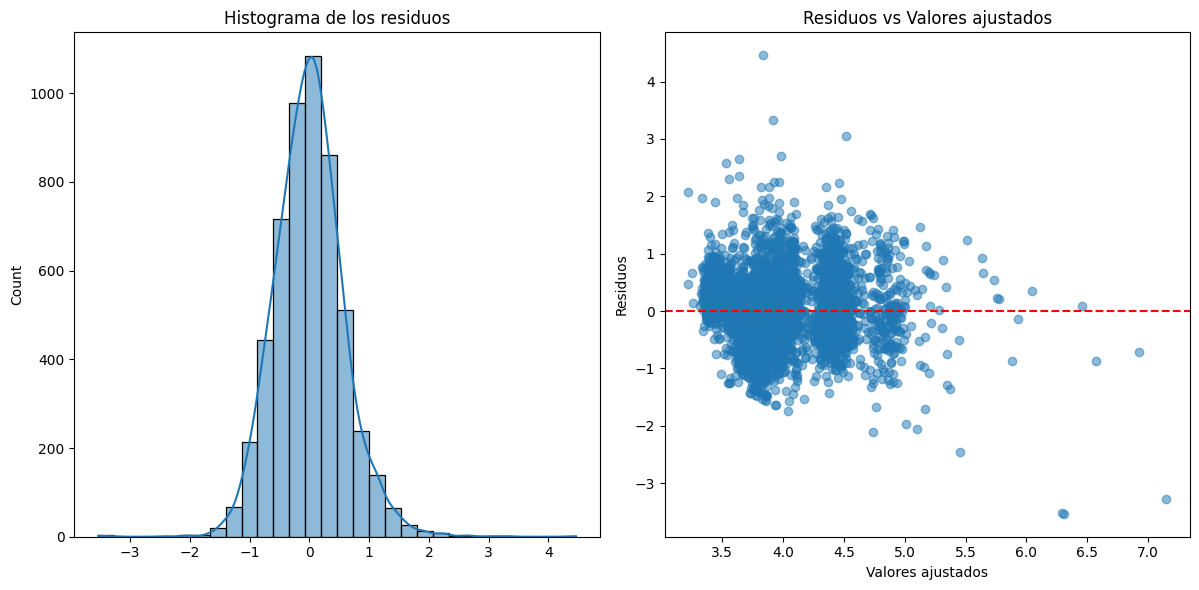

Estadístico KS: 0.030118915866556684
Valor p de KS: 0.000109623188894223


In [25]:
# Definir las variables independientes (X) y dependientes (Y)
X = df[['dormitorios', 'personas', 'puntaje', 'distancia', 'baños', 'estadia']]
Y = df['log_precio']

# Agregar una constante a las variables independientes (intercepto de la regresión)
X = sm.add_constant(X)

# Crear el modelo de regresión lineal
model = sm.OLS(Y, X)

# Ajustar el modelo
results = model.fit()

# Obtener los residuos
residuals = results.resid
fitted_values = results.fittedvalues  # Valores ajustados

# Graficar los residuos
plt.figure(figsize=(18, 6))

# Histograma de los residuos
plt.subplot(1, 3, 1)
sns.histplot(residuals, kde=True, bins=30)
plt.title("Histograma de los residuos")

# Gráfico de dispersión de los residuos
plt.subplot(1, 3, 2)
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuos vs Valores ajustados")
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')

plt.tight_layout()
plt.show()

# Test de Kolmogorov-Smirnov
ks_stat, ks_p_value = stats.kstest(residuals, 'norm', args=(np.mean(residuals), np.std(residuals)))
print(f"Estadístico KS: {ks_stat}")
print(f"Valor p de KS: {ks_p_value}")

In [26]:
X = df[['dormitorios', 'personas', 'puntaje', 'distancia', 'baños', 'estadia']]
X = sm.add_constant(X)
bp_test = het_breuschpagan(residuals, X)
print("el p-valor de la prueba b-p es:", bp_test[3])

el p-valor de la prueba b-p es: 1.9543471246268705e-94


No hay grandes cambios respecto a la primera regresión propuesta. Los errores siguen sin presentar una distribución normal y sin pasar el test de homocedasticidad.

# e) Estudiando el efecto del tipo de alojamiento

Dado que la variable tipo es un factor de 3 niveles, para estudiar su efecto sobre el precio de los alojamientos podemos contruir dos variables dummies:

*   private: toma valor 1 si el tipo es "Private room" y 0 en otro caso.
*   shared: toma valor 1 si el tipo es "Shared room" y 0 en otro caso.

Incluyamos estas variables con las mismas covariables antes seleccionadas

In [28]:
# Definir las variables independientes (X) y dependientes (Y)
X = df[['dormitorios', 'personas', 'puntaje', 'distancia', 'baños', 'estadia', 'private', 'shared']]
Y = df['log_precio']

# Agregar una constante a las variables independientes (intercepto de la regresión)
X = sm.add_constant(X)

# Crear el modelo de regresión lineal
model = sm.OLS(Y, X)

# Ajustar el modelo
results = model.fit()

# Imprimir el resumen de los resultados
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             log_precio   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     511.5
Date:                Mon, 14 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:33:44   Log-Likelihood:                -4097.4
No. Observations:                5396   AIC:                             8213.
Df Residuals:                    5387   BIC:                             8272.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.9291      0.030    129.743      

Lo primero que notamos es que el poder explicativo del nuevo modelo aumenta de forma considerable. Ahora, el nuevo modelo explica el $43 \%$ de la variabilidad total del logaritmo de los precios. El AIC también mejora y todas las covariables resultan significativas al $5 \%$. Este modelo parece ser mejor que los anteriores.

Los coeficientes estimados se interpretan de la siguiente forma:
*   Al aumentar en 1 la cantidad de dormitorios del alojamiento, el precio tiende a aumentar en un $0.33 \%$ en promedio.
*   Al aumentar en 1 la cantidad de personas que pueden alojarse, el precio tiende a aumentar en un $0.025 \%$ en promedio.
*   Al aumentar en 1 el puntaje promedio del alojamiento, el precio tiende a isminuir en un $0.038 \%$ en promedio.
*  Al aumentar en 1 la distancia del alojamiento a la estación de trenes más cercana, el precio tiende a disminuor en $0.00044 \%$ en promedio.
*  Al aumentar en 1 la cantidad de baños disponibles en el alojamiento, el precio tiende a disminuir en $0.02 \%$ en promedio.
*  Al aumentar en 1 la cantidad de días mínima por la que se alquila el alojamiento, el precio tiende a disminuir en $0.023 \%$ en promedio.
*  Los alojamientos de tipo "habitación privada" tienden a tener un precio un $0.57 \%$ menor a los alojamientos de tipo "casa o departamento entera" en promedio (manteniendo los mismos valores para las restantes covariables).
*  Los alojamientos de tipo "habitación compartida" tienden a tener un precio un $1.08 \%$ menor a los alojamientos de tipo "casa o departamento entera" en promedio (manteniendo los mismos valores para las restantes covariables).

Analicemos nuevamente los residuos de esta regresión.


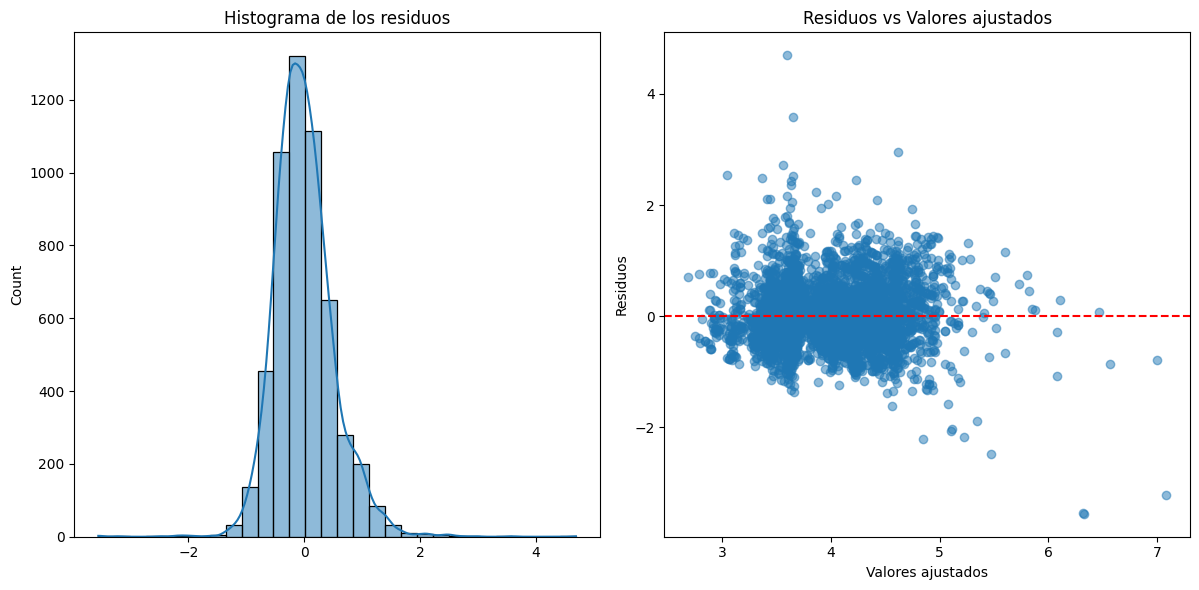

Estadístico KS: 0.053024300510159494
Valor p de KS: 1.2599915254292974e-13


In [29]:
# Definir las variables independientes (X) y dependientes (Y)
X = df[['dormitorios', 'personas', 'puntaje', 'distancia', 'baños', 'estadia', 'private', 'shared']]
Y = df['log_precio']

# Agregar una constante a las variables independientes (intercepto de la regresión)
X = sm.add_constant(X)

# Crear el modelo de regresión lineal
model = sm.OLS(Y, X)

# Ajustar el modelo
results = model.fit()

# Obtener los residuos
residuals = results.resid
fitted_values = results.fittedvalues  # Valores ajustados

# Graficar los residuos
plt.figure(figsize=(18, 6))

# Histograma de los residuos
plt.subplot(1, 3, 1)
sns.histplot(residuals, kde=True, bins=30)
plt.title("Histograma de los residuos")

# Gráfico de dispersión de los residuos
plt.subplot(1, 3, 2)
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuos vs Valores ajustados")
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')

plt.tight_layout()
plt.show()

# Test de Kolmogorov-Smirnov
ks_stat, ks_p_value = stats.kstest(residuals, 'norm', args=(np.mean(residuals), np.std(residuals)))
print(f"Estadístico KS: {ks_stat}")
print(f"Valor p de KS: {ks_p_value}")

In [31]:
X = df[['dormitorios', 'personas', 'puntaje', 'distancia', 'baños', 'estadia', 'private', 'shared']]
X = sm.add_constant(X)
bp_test = het_breuschpagan(residuals, X)
print("el p-valor de la prueba b-p es:", bp_test[3])

el p-valor de la prueba b-p es: 1.8668053622762293e-70


Los residuos siguen sin presentar una distribución normal y continuan siendo heterocedásticos acorde al test de Breusch-Pagan.

Por un lado, un dato atípico es una observación que tiene un valor de Y (la variable dependiente) que se desvía mucho de lo que predice el modelo. Por tanto, para analizar si es un dato atípico o no, existen varios criterios, a través del análisis de los residuos del modelo.
En algunos casos, se considera que, si el valor absoluto del residuo estudiantizado es mayor a 3, entonces se considera un dato atípico. También, puede calcularse los residuos estudiantizados bajo una distribución t con n-k-2 grados de libertad (siendo n el tamaño de la miestra y k el número de parámetros), y considerar el caso más extremo (de mayor residuo) y corriger su significatividad por el criterio de Bonferroni, que multiplica dicho nivel de significancia al que puede considerarse un outlier por el número de observaciones.
Por ambos criterios, si existen datos atípicos.

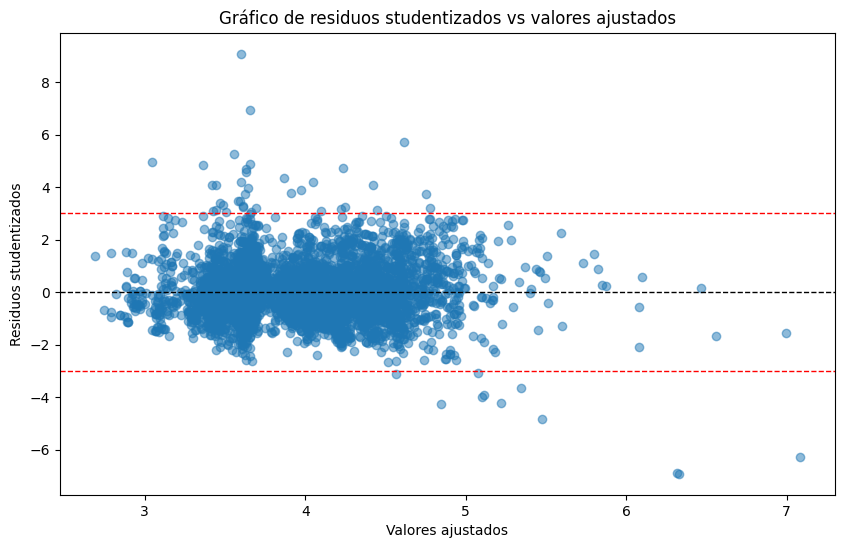

In [34]:
from statsmodels.stats.outliers_influence import OLSInfluence

# Definir las variables independientes (X) y dependientes (Y)
X = df[['dormitorios', 'personas', 'puntaje', 'distancia', 'baños', 'estadia', 'private', 'shared']]
Y = df['log_precio']

# Agregar una constante a las variables independientes (intercepto de la regresión)
X = sm.add_constant(X)

# Crear el modelo de regresión lineal y ajustarlo
model = sm.OLS(Y, X)
results = model.fit()

# Obtener los valores ajustados y los residuos studentizados
fitted_values = results.fittedvalues
studentized_residuals = OLSInfluence(results).resid_studentized_internal

# Graficar residuos studentizados vs valores ajustados
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, studentized_residuals, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.axhline(y=3, color='red', linestyle='--', linewidth=1)
plt.axhline(y=-3, color='red', linestyle='--', linewidth=1)
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos studentizados")
plt.title("Gráfico de residuos studentizados vs valores ajustados")
plt.show()

Varios puntos quedan fuera de las bandas, por lo que consideramos que si existen valores atípicos.


Por otro lado, para considerar datos influyentes, se puede considerar el leverange, que mide cuánto una observación se aleja de la media de los valores de las variables independientes (X).
Sin embargo, una medida que combina en su cálculo el leverage y los residuos (datos atípicos) es la distancia de Cook, que se considera una mejor medida para la detección de datos influyentes. El criterio que se utilizar para la misma son varios según el autor, pero entre ellos, cuando $D_i>4/n$ o bien $D_i>4/(n-k-1)$, se consideran casos influyentes.
Tomando cualquiera de los dos criterios, existen también datos influyentes.


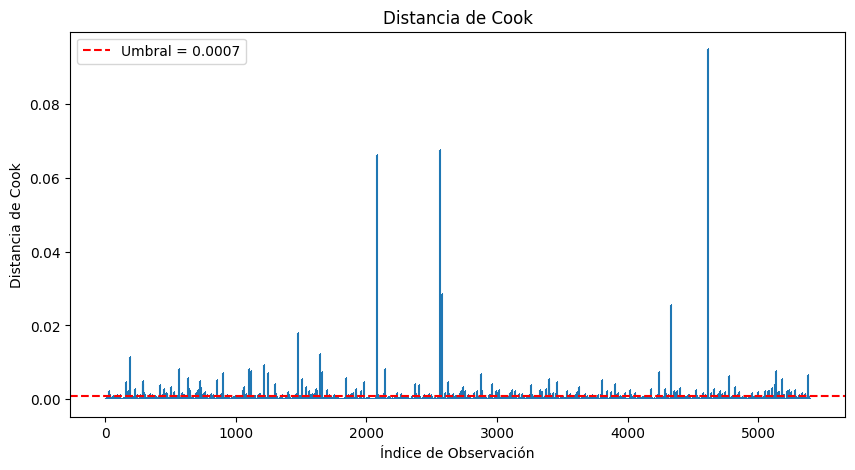

In [39]:
from statsmodels.stats.outliers_influence import OLSInfluence

influencia = OLSInfluence(results)
distancia_cook = influencia.cooks_distance[0]

plt.figure(figsize=(10, 5))
# Remove use_line_collection argument and use basefmt instead
plt.stem(np.arange(len(distancia_cook)), distancia_cook, markerfmt=",", basefmt=" ")
plt.title("Distancia de Cook")
plt.xlabel("Índice de Observación")
plt.ylabel("Distancia de Cook")

# Línea de corte típica: 4 / (n - k)
n = X.shape[0]
k = X.shape[1]
umbral = 4 / (n - k)
plt.axhline(y=umbral, color='red', linestyle='--', label=f"Umbral = {umbral:.4f}")
plt.legend()
plt.show()

Como podemos observar en el gráfico, existen datos influyentesPor último, la decisión de que hacer con los datos influyentes depende de varias cosas.
Por un lado, si es un error de medición o de carga de datos, se procede a corregirlo o se puede eliminar (que quede registrado en el análisis la eliminación del dato).
Si es un dato real, pero raro, es necesario analizar el caso y tratarlo con criterio acorde a la teoría.

Otra opción es utilizar una matriz de varianzas y covarianzas robusta a la heterocedasticidad, como la matriz sandwich de White.
